In [1]:
pip install flask

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Shubham Dodiya\openvino_env\Scripts\python.exe -m pip install --upgrade pip


In [3]:
pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ----- ---------------------------------- 0.2/1.5 MB 6.9 MB/s eta 0:00:01
     ----------- ---------------------------- 0.4/1.5 MB 4.5 MB/s eta 0:00:01
     ------------------ --------------------- 0.7/1.5 MB 5.0 MB/s eta 0:00:01
     ------------------------ --------------- 0.9/1.5 MB 4.8 MB/s eta 0:00:01
     ------------------------------- -------- 1.2/1.5 MB 4.7 MB/s eta 0:00:01
     ------------------------------------ --- 1.4/1.5 MB 4.8 MB/s eta 0:00:01
     ---------------------------------------  1.5/1.5 MB 4.8 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Shubham Dodiya\openvino_env\Scripts\python.exe -m pip install --upgrade pip


In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from flask import Flask, request, render_template

In [5]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Shubham
[nltk_data]     Dodiya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Shubham
[nltk_data]     Dodiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Shubham
[nltk_data]     Dodiya\AppData\Roaming\nltk_data...


True

In [6]:
# Initialize Flask app
app = Flask(__name__)

In [7]:
# Step 3: Text preprocessing using NLTK
def preprocess_text(text):
    # Tokenize the text into individual words
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join the preprocessed tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [9]:
# Step 4: Convert text to numerical feature vectors using TF-IDF vectorization
def vectorize_text(text):
    vectorizer = TfidfVectorizer()
    vectorized_text = vectorizer.fit_transform(text)
    return vectorized_text


In [10]:
# Step 5: Load and preprocess the dataset
data = pd.read_csv('sentiment_data.csv')
data['text'] = data['text'].apply(preprocess_text)

In [20]:
data.shape

(50000, 2)

In [11]:
# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [14]:
# # Step 7: Train a LinearSVC model
# model = LinearSVC()
# vectorized_X_train = vectorize_text(X_train)
# model.fit(vectorized_X_train, y_train)

# Step 6: Train a LinearSVC model
vectorizer = TfidfVectorizer()
vectorized_X_train = vectorizer.fit_transform(X_train)
model.fit(vectorized_X_train, y_train)

LinearSVC()

In [15]:
# # Step 8: Evaluate the model on the testing set
# vectorized_X_test = vectorize_text(X_test)
# predictions = model.predict(vectorized_X_test)
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)

# Step 8: Evaluate the model on the testing set
vectorized_X_test = vectorizer.transform(X_test)
predictions = model.predict(vectorized_X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8935


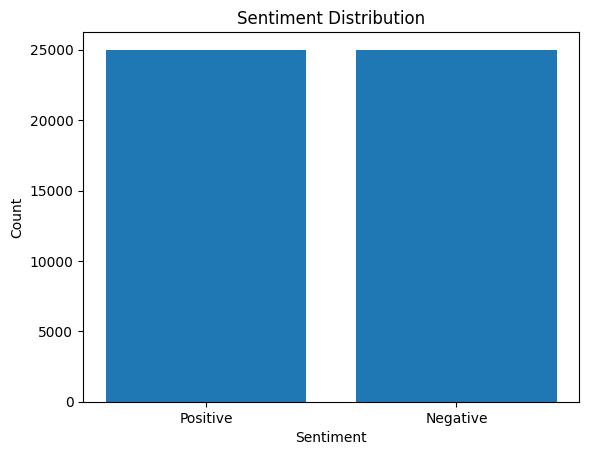

In [16]:
# Step 9: Visualize the results using Matplotlib
labels = ['Positive', 'Negative']
counts = [sum(data['label'] == 'positive'), sum(data['label'] == 'negative')]

plt.bar(labels, counts)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [23]:
# Flask app routes
@app.route('/')
def index():
    # Assuming you have your dataset loaded into a variable called 'dataset'
    data = data.to_dict('records')
    return render_template('index.html', data=data)


@app.route('/predict', methods=['POST'])
def predict():
    text = request.form['text']
    preprocessed_text = preprocess_text(text)
    vectorized_text = vectorize_text([preprocessed_text])
    prediction = model.predict(vectorized_text)[0]
    return render_template('index.html', prediction=prediction)

if __name__ == '__main__':
    app.run()
    
@app.route('/')
def index():
    # Assuming you have your dataset loaded into a variable called 'dataset'
    data = dataset.to_dict('records')
    return render_template('index.html', data=data)


AssertionError: View function mapping is overwriting an existing endpoint function: index

In [19]:
# Flask app routes
@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    text = request.form['text']
    preprocessed_text = preprocess_text(text)
    vectorized_text = vectorize_text([preprocessed_text])
    prediction = model.predict(vectorized_text)[0]
    return render_template('index.html', prediction=prediction)

if __name__ == '__main__':
    app.run(debug=True)


AssertionError: View function mapping is overwriting an existing endpoint function: predict

In [21]:
@app.route('/')
def index():
    # Assuming you have your dataset loaded into a variable called 'dataset'
    data = data.to_dict('records')
    return render_template('index.html', data=data)


AssertionError: View function mapping is overwriting an existing endpoint function: index

In [24]:
# Flask app routes
@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    text = request.form['text']
    preprocessed_text = preprocess_text(text)
    vectorized_text = vectorize_text([preprocessed_text])
    prediction = model.predict(vectorized_text)[0]
    return render_template('index.html', prediction=prediction)

if __name__ == '__main__':
    app.run(debug=True)


AssertionError: View function mapping is overwriting an existing endpoint function: home